<a href="https://colab.research.google.com/github/manashpratim/Devanagari-Character-Classification/blob/master/Devanagari_Character_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
      "https://storage.googleapis.com/kaggle-datasets/1168/3719/data.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561109064&Signature=dnC%2BBTo%2FA0wPPTZ1PdWSTgHpQGSLcpCUYx3W4AB680FB%2BgQD6J1ZYPPjPs%2BBhdPGTEBeCMgyEYvV5zkAFiDT9y1pqS8WXGEppD%2BhpMvCf2WAxJLLk6S8YTHtYMxIFU4WlUw5qmGP0GyN8cRRQ8bHzFfKiok3vbc2wrnuEmRKRynMfIZweK3b0oA%2FWFdSrhVK9LPVm2uJr25ghyEv7RjL6QwLV1R8u6Kq3wlgCBb3tmrZ541rtfB85cgjMBIrWFNqAkea6XsqdgaxUXOwqzN6iE8PLXjWOSS58nA0QfHRFMZo7aLiC4KJZjw2QDa1UvgDUazIk%2FXRa4fExYMMDqYLEg%3D%3D" \
      -O "/tmp/devanagari.zip"

--2019-06-18 10:23:43--  https://storage.googleapis.com/kaggle-datasets/1168/3719/data.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1561109064&Signature=dnC%2BBTo%2FA0wPPTZ1PdWSTgHpQGSLcpCUYx3W4AB680FB%2BgQD6J1ZYPPjPs%2BBhdPGTEBeCMgyEYvV5zkAFiDT9y1pqS8WXGEppD%2BhpMvCf2WAxJLLk6S8YTHtYMxIFU4WlUw5qmGP0GyN8cRRQ8bHzFfKiok3vbc2wrnuEmRKRynMfIZweK3b0oA%2FWFdSrhVK9LPVm2uJr25ghyEv7RjL6QwLV1R8u6Kq3wlgCBb3tmrZ541rtfB85cgjMBIrWFNqAkea6XsqdgaxUXOwqzN6iE8PLXjWOSS58nA0QfHRFMZo7aLiC4KJZjw2QDa1UvgDUazIk%2FXRa4fExYMMDqYLEg%3D%3D
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 2404:6800:4008:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49541075 (47M) [application/octet-stream]
Saving to: ‘/tmp/devanagari.zip’

/tmp/devanagari.zip 100%[===================>]  47.25M  27.8MB/s    in 1.7s    

2019-06-18 10:23:45 (27.8 MB/s) - ‘/tmp/dev

In [0]:
import os
import zipfile

local_zip='/tmp/devanagari.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/devanagari')
zip_ref.close()

In [0]:
#The devanagari file contains a .csv file containing the pixels and labels of the images. Each row consists of 1024 pixels and the label of the character
import csv
fields = [] 
rows = [] 
import numpy as np

with open('/tmp/devanagari/data.csv') as training_file:
    # creating a csv reader object 
    csvreader = csv.reader(training_file) 
      
    # extracting field names through first row 
    fields = next(csvreader) 
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row)

In [0]:
#Randomizing the data and splitting it into training and test sets
import random
suffled_set=random.sample(rows,len(rows))
train_len=int(len(suffled_set)*0.9)
train_set=suffled_set[:train_len]
test_set=suffled_set[train_len:]

In [0]:
#Function to separate the Images and Labels from the data.
#Returns images as 32X32 numpy array and labels as numeric data
def img_label(array):
  labels=[]
  images=[]

  #Separating the images and labels
  for i in range(len(array)):
    labels.append(array[i][-1])
    images.append(array[i][:-1])
   
  #Converting the pixels of the images from string to float
  for i in range(len(images)):
    images[i] = list(map(float, images[i]))
  
  # Tranforming the categorical labels to numeric
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  le.fit(labels)
  labels=le.transform(labels)
  
  # Converting the images and labels to numpy array
  images=np.array(images)
  labels=np.array(labels)
  
  img=np.zeros((len(images),32,32))
  
  #Reshaping the Images from 1024 pixels to 32x32
  for i in range(len(images)):
      img[i]=images[i].reshape((32,32))
   
  #Extending the dimension of the Images
  img=np.expand_dims(img,axis=3)
  
  return img,labels

In [0]:
#Separation the Images and Labels from the data
train_images,train_labels=img_label(train_set)
test_images,test_labels=img_label(test_set)

In [60]:
#Data Summary
print('No. of training images: ',len(train_images))
print('No. of test images: ',len(test_images))
print('No. of classes in training data: ', len(np.unique(train_labels)))
print('No. of classes in test data: ', len(np.unique(test_labels)))
print('Dimension of training images: ',train_images.shape)
print('Dimension of test images: ',test_images.shape)
print('Dimension of training labels: ',train_labels.shape)
print('Dimension of test labels: ',test_labels.shape)

No. of training images:  82800
No. of test images:  9200
No. of classes in training data:  46
No. of classes in test data:  46
Dimension of training images:  (82800, 32, 32, 1)
Dimension of test images:  (9200, 32, 32, 1)
Dimension of training labels:  (82800,)
Dimension of test labels:  (9200,)


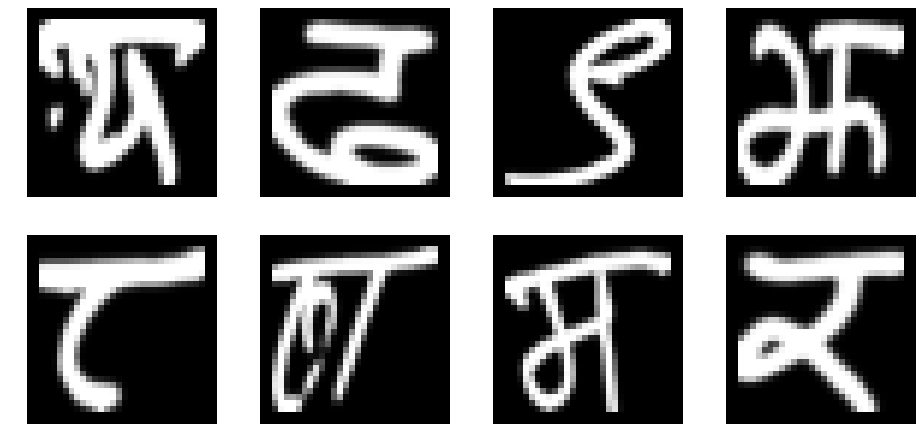

In [101]:
#Displaying the images of characters
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#We'll output images in a 4X4 configuration.  

nrows=4
ncols=4



fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)


for i in range(len(train_images[:8])):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  X = np.squeeze(train_images[i], axis=(2,)) # sample 2D array
  plt.imshow(X, cmap="gray")
plt.show()

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
"""train_datagen = ImageDataGenerator(rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')"""
train_datagen = ImageDataGenerator(rescale = 1./255)                                
test_datagen=ImageDataGenerator(rescale=1./255)


In [0]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(32,32,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(46,activation='softmax')
])

In [73]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit_generator(
  train_datagen.flow(train_images,train_labels,batch_size=1000),
  steps_per_epoch=len(train_images)/1000,
  epochs=10,
  validation_data=test_datagen.flow(test_images,test_labels,batch_size=100),
  validation_steps=len(test_images)/100,
  verbose=1
)

Epoch 1/10
83/82 [==============================] - 10s 118ms/step - loss: 0.0137 - acc: 0.9966 - val_loss: 0.0880 - val_acc: 0.9799
Epoch 2/10
83/82 [==============================] - 9s 103ms/step - loss: 0.0081 - acc: 0.9977 - val_loss: 0.0860 - val_acc: 0.9778
Epoch 3/10
83/82 [==============================] - 9s 104ms/step - loss: 0.0066 - acc: 0.9984 - val_loss: 0.1114 - val_acc: 0.9743
Epoch 4/10
83/82 [==============================] - 9s 103ms/step - loss: 0.0065 - acc: 0.9984 - val_loss: 0.0811 - val_acc: 0.9808
Epoch 5/10
83/82 [==============================] - 9s 104ms/step - loss: 0.0034 - acc: 0.9990 - val_loss: 0.0888 - val_acc: 0.9796
Epoch 6/10
83/82 [==============================] - 9s 104ms/step - loss: 0.0035 - acc: 0.9991 - val_loss: 0.0874 - val_acc: 0.9816
Epoch 7/10
83/82 [==============================] - 9s 105ms/step - loss: 0.0034 - acc: 0.9990 - val_loss: 0.0987 - val_acc: 0.9810
Epoch 8/10
83/82 [==============================] - 9s 105ms/step - loss: 0

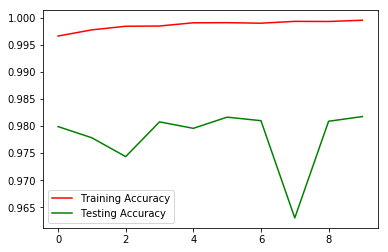

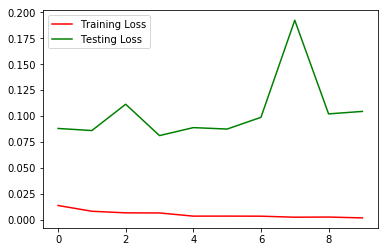

In [74]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()